In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import json
import seaborn
from os.path import join
%matplotlib inline

In [2]:
# We need to load a "fixture", which basically is just a class that collates the different
# reader types we are going to need.  We can then index into it by holenumber to get a "FixtureZmw",
# which collates the Zmw object types and provides a good interface.

from PRmm.fixture import Fixture
fx = Fixture.fromIniFile("fixtures.ini", "MyStream")

In [3]:
# This is the set of "false negatives" we were looking at the other day.

falseNegatives = pd.read_csv("JobDir/nohq_mapped_zmws.csv")
falseNegativeHns = falseNegatives["d1_big.holeNumber"]

In [4]:
# Now, we load the basecaller metrics, which I dumped to an hdf5 file using the bazviewer -H option.
# (FYI, there are other plotting routines in PRmm.extras.activityPlots that allow 
#  computing the metrics "on the fly" (slower) which you can also try.

# MARK, comment out the other line below.

from PRmm.extras.hqrfHmm import loadBazViewerHDF5

#metricsDf = loadBazViewerHDF5("/home/UNIXHOME/dalexander/Projects/Bugs/HQRF-echidna/rerun.metrics.h5")
metricsDf = loadBazViewerHDF5("rerun.metrics.h5")

array('f', [0.0, 0.0, 0.0, 0.0])


<function __main__.plotMetricsP>

/Users/dalexander/.virtualenvs/VE-Qt/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


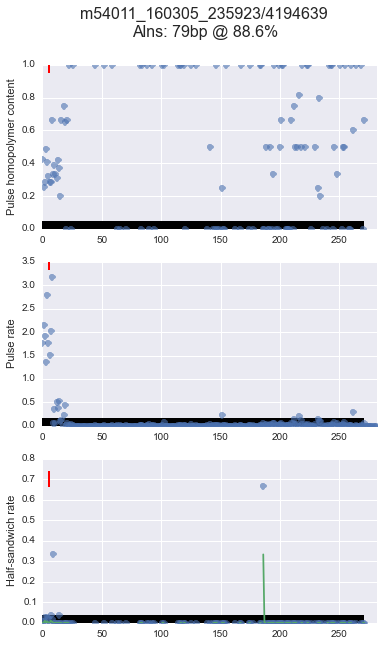

In [5]:
# Now we run an interactive widget thingy that lets us choose a ZMW and then 
# see the metrics values plotted vs MF block index.

# I have no idea what the warning is that matplotlib is issuing, I'd love if you could help 
# me fix it.

from PRmm.extras.activityPlots import hdf5MetricsPlot
from ipywidgets import *

def plotMetricsP(hnString):
    hn = int(hnString)
    z = fx[hn]
    hdf5MetricsPlot(metricsDf, hn, fx)
    print z.hqRegionSnr
    
hnW = Select(options=map(str, falseNegativeHns))

interact(plotMetricsP, hnString=hnW)    
